In [1]:
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model1= cobra.io.load_matlab_model("C:/Users/NOE/Downloads/rFASTCORMICS-master/rFASTCORMICS-master/rFASTCORMICS for RNA-seq data/SampleModeli_TCGA06067511A32RA36H07.mat")
model2= cobra.io.load_matlab_model("C:/Users/NOE/Downloads/rFASTCORMICS-master/rFASTCORMICS-master/rFASTCORMICS for RNA-seq data/SampleModeli_TCGA06067811A32RA36H07.mat")
modelc= cobra.io.load_matlab_model("C:/Users/NOE/Downloads/rFASTCORMICS-master/rFASTCORMICS-master/rFASTCORMICS for RNA-seq data/Cmodel1.mat")

No defined compartments in model ContextModel. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x
No defined compartments in model ContextModel. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x
No defined compartments in model Cmodel. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


In [3]:
modelc

Name,Cmodel
Memory address,19ae3d09dd0
Number of metabolites,5835
Number of reactions,10600
Number of genes,2248
Number of groups,103
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


In [4]:
model1

Name,ContextModel
Memory address,1c8627b7910
Number of metabolites,3043
Number of reactions,4131
Number of genes,2248
Number of groups,93
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, m, x, e, l, r, g, n"


In [5]:
model2

Name,ContextModel
Memory address,1c861f4f190
Number of metabolites,3080
Number of reactions,4178
Number of genes,2248
Number of groups,93
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, x, e, r, g, n"


# Flux Balance Analysis (FBA)

Model C:

In [7]:
solutionmodelc=modelc.optimize()
print(solutionmodelc)

<Solution 755.003 at 0x1c8677f2e10>


In [8]:
solutionmodelc

,fluxes,reduced_costs
10FTHF5GLUtl,0.0,0.000000
10FTHF5GLUtm,0.0,-0.080319
10FTHF6GLUtl,0.0,0.000000
10FTHF6GLUtm,0.0,0.000000
10FTHF7GLUtl,0.0,0.000000
...,...,...
CYOR_u10mi,500.0,0.000000
Htmi,1000.0,0.000000
NADH2_u10mi,0.0,0.000000
CYOOm3i,750.0,0.000000


In [9]:
xc = solutionmodelc.objective_value
print('La biomassa deñ modelc és:', xc)

La biomassa deñ modelc és: 755.003215550663


Model 1:

In [11]:
solutionmodel1=model1.optimize()
print(solutionmodel1)

<Solution 193.526 at 0x1c875fafa50>


In [12]:
solutionmodel1

,fluxes,reduced_costs
13DAMPPOX,0.000000e+00,-6.141060e-02
2HBO,-2.973861e+02,-1.121720e-34
2HBt2,0.000000e+00,0.000000e+00
2HCO3_NAt,1.000000e+03,0.000000e+00
2OXOADOXm,0.000000e+00,-7.407209e-02
...,...,...
sink_asp_L[c],5.634757e+02,0.000000e+00
sink_glu_L[c],-1.000000e+03,-2.323644e-02
sink_pro_L[c],-7.982576e+01,-0.000000e+00
sink_4abut[l],-2.252071e-27,-4.521112e-19


In [13]:
x1 =solutionmodel1.objective_value
print ('La biomassa del model 1 és:',x1)

La biomassa del model 1 és: 193.52637551258826


Model 2:

In [14]:
solutionmodel2=model2.optimize()
print(solutionmodel2)

<Solution 241.496 at 0x1c87586c650>


In [10]:
solutionmodel2

,fluxes,reduced_costs
10FTHF7GLUtl,0.000000,0.000000e+00
10FTHFtl,0.000000,-0.000000e+00
13DAMPPOX,0.000000,2.729399e-18
2AMACHYD,0.000000,3.194813e-17
2HBO,-142.857143,5.982507e-34
...,...,...
sink_asp_L[c],914.845969,0.000000e+00
sink_pro_L[c],-96.399067,-0.000000e+00
sink_4abut[l],0.000000,-0.000000e+00
DM_5cysdopa[c],0.000000,0.000000e+00


In [15]:
x2 = solutionmodel2.objective_value
print('La biomassa corresponent al Model 2 és:',x2)

La biomassa corresponent al Model 2 és: 241.49635780023098


In [16]:
data = {
    'Modelo': ['Modelo c','Modelo 1', 'Modelo 2'],
    'Biomasses': [solutionmodelc.objective_value,solutionmodel1.objective_value, solutionmodel2.objective_value]
}

In [17]:
tabla=pd.DataFrame(data)
tabla

,Modelo,Biomasses
0,Modelo c,755.003216
1,Modelo 1,193.526376
2,Modelo 2,241.496358


# Histograma

Tabular dades dels fluxos amb les seves reaccions del model 1:

In [52]:
tabla_flujos1={'Flujos1':solutionmodel1.fluxes}
tabla_flujos1=pd.DataFrame(tabla_flujos1)
tabla_flujos1

,Flujos1
13DAMPPOX,0.000000e+00
2HBO,-2.973861e+02
2HBt2,0.000000e+00
2HCO3_NAt,1.000000e+03
2OXOADOXm,0.000000e+00
...,...
sink_asp_L[c],5.634757e+02
sink_glu_L[c],-1.000000e+03
sink_pro_L[c],-7.982576e+01
sink_4abut[l],-2.252071e-27


Tabular fluxos amb les reaccions del model 2

In [49]:
tabla_flujos2={'Flujos2':solutionmodel2.fluxes}
tabla_flujos2=pd.DataFrame(tabla_flujos2)
tabla_flujos2

,Flujos2
10FTHF7GLUtl,0.000000
10FTHFtl,0.000000
13DAMPPOX,0.000000
2AMACHYD,0.000000
2HBO,-142.857143
...,...
sink_asp_L[c],914.845969
sink_pro_L[c],-96.399067
sink_4abut[l],0.000000
DM_5cysdopa[c],0.000000


Fer una taula conjunta de les reaccions i fluxos del model 1  i 2

In [65]:
fluxes=pd.concat([tabla_flujos1, tabla_flujos2], axis=1) #al poner el axis=1 agregas en horizontal (ppones una columna mas)
fluxes                                                     #si pones axis=0 agregas verticalmente, pones los datos a bajo (todo en una colmna)

,Flujos1,Flujos2
13DAMPPOX,0.000000,0.000000
2HBO,-297.386146,-142.857143
2HBt2,0.000000,0.000000
2HCO3_NAt,1000.000000,0.000000
2OXOADOXm,0.000000,0.000000
...,...,...
sink_lys_L[c],NaN,-56.232427
sink_met_L[c],NaN,-36.953773
sink_asn_L[c],NaN,-67.478912
DM_5cysdopa[c],NaN,0.000000


HISTOGRAMA:

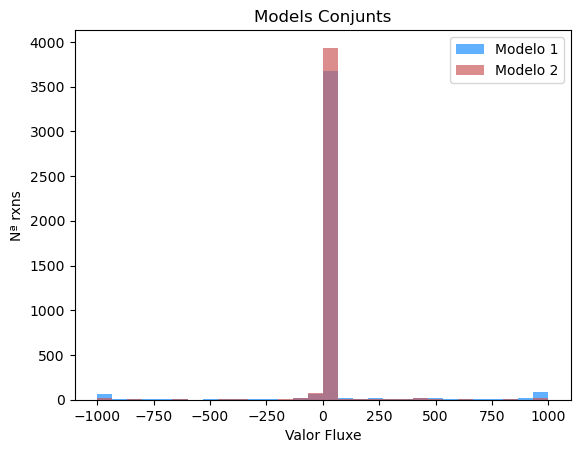

In [55]:
plt.hist(fluxes['Flujos1'], bins=30, color='dodgerblue', alpha=0.7, label='Modelo 1')
plt.hist(fluxes['Flujos2'], bins=30, color='indianred', alpha=0.7, label='Modelo 2')
plt.title('Models Conjunts')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

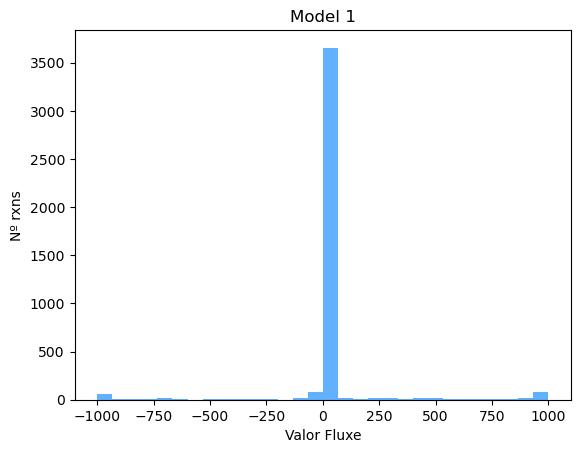

In [194]:
hist_1=plt.hist(fluxes['Flujos1'], bins=30, color='dodgerblue', alpha=0.7)
plt.title('Model 1')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

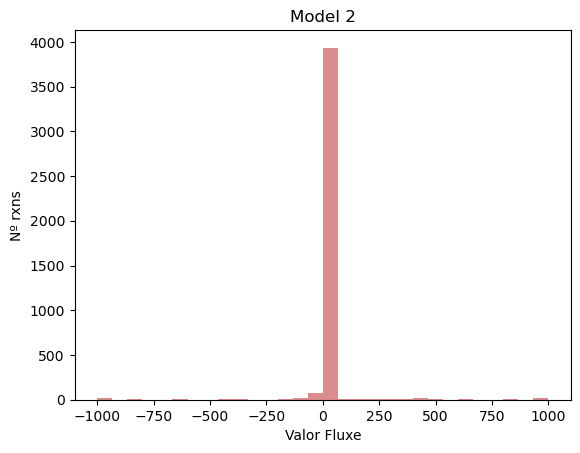

In [196]:
hist_2=plt.hist(fluxes['Flujos2'], bins=30, color='indianred', alpha=0.7)
plt.title('Model 2')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

# Transformació i visualització de dades

In [48]:
def flux_transformer(v):
    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [60]:
flujos_t1 = tabla_flujos1.applymap(flux_transformer)
flujos_t1

,Flujos1
13DAMPPOX,0.000000
2HBO,-8.216194
2HBt2,0.000000
2HCO3_NAt,9.965784
2OXOADOXm,0.000000
...,...
sink_asp_L[c],9.138210
sink_glu_L[c],-9.965784
sink_pro_L[c],-6.318782
sink_4abut[l],-0.000000


In [64]:
flujos_t2 = tabla_flujos2.applymap(flux_transformer)
flujos_t2

,Flujos2
10FTHF7GLUtl,0.000000
10FTHFtl,0.000000
13DAMPPOX,0.000000
2AMACHYD,0.000000
2HBO,-7.158429
...,...
sink_asp_L[c],9.837385
sink_pro_L[c],-6.590947
sink_4abut[l],0.000000
DM_5cysdopa[c],0.000000


In [69]:
flujos_t = pd.concat([flujos_t1, flujos_t2], axis=1)
flujos_t

,Flujos1,Flujos2
13DAMPPOX,0.000000,0.000000
2HBO,-8.216194,-7.158429
2HBt2,0.000000,0.000000
2HCO3_NAt,9.965784,0.000000
2OXOADOXm,0.000000,0.000000
...,...,...
sink_lys_L[c],NaN,-5.813330
sink_met_L[c],NaN,-5.207650
sink_asn_L[c],NaN,-6.076365
DM_5cysdopa[c],NaN,0.000000


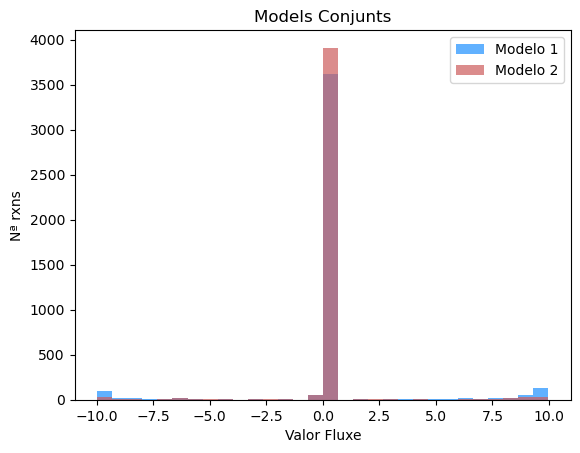

In [73]:
plt.hist(flujos_t['Flujos1'], bins=30, color='dodgerblue', alpha=0.7, label='Modelo 1')
plt.hist(flujos_t['Flujos2'], bins=30, color='indianred', alpha=0.7, label='Modelo 2')
plt.title('Models Conjunts')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)